<a href="https://colab.research.google.com/github/kanakesh2006/Crop_Recommendation_System/blob/main/Crop_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crop Recommendation

Maximize agricultural yield by recommending appropriate crops



Kaggle Dataset link : https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset

Github Repo link :

#### Import Dataset through Kaggle (upload kaggle.json)

In [ ]:
!pip install -q kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
dataset_name = 'atharvaingle/crop-recommendation-dataset'

!kaggle datasets download -d {dataset_name}

import os
zip_file_name = dataset_name.split('/')[-1] + '.zip'

!unzip -q {zip_file_name}

!rm {zip_file_name}

!ls

## Exploratory Data Analysis

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/Crop_recommendation.csv")

In [ ]:
df.head()

In [ ]:
df.sample(3)

In [ ]:
df.shape

In [ ]:
# Dataset overview
df.info()

In [ ]:
# Check for missing values
print(df.isnull().sum())

In [ ]:
# checking the duplicated values in dataset
df.duplicated().sum()

In [ ]:
# Basic statistics
df.describe()

In [ ]:
# Number of unique crops
print("Number of unique crops:", df['label'].nunique())
print("Crops:", df['label'].unique())

In [ ]:
# Count of each crop
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette="viridis")
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.show()

From the crop distribution plot, we can see the following insights:

* **Balanced Dataset**: The plot shows that the dataset is remarkably balanced. Each of the 22 unique crop types has exactly 100 data points.
* **Equal Representation**: This equal representation of each crop type is ideal for training a classification model, as it prevents the model from being biased towards any particular crop due to an uneven distribution of data.

In [ ]:
# Distribution of features
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(14,10))
for i, col in enumerate(features, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[col], kde=True, color="teal")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


From the distribution plots of the features, we can gain the following insights:

* **N (Nitrogen)**: The distribution of Nitrogen appears to be somewhat multimodal, with peaks at lower and higher values. This suggests that there might be different groups of crops with distinct nitrogen requirements.
* **P (Phosphorus)**: The Phosphorus distribution also shows multiple peaks, indicating varying phosphorus levels across the dataset, likely corresponding to different crop needs.
* **K (Potassium)**: The Potassium distribution is skewed to the right, with a large concentration of values at the lower end and a few crops requiring much higher levels.
* **Temperature**: The temperature distribution seems roughly bell-shaped, indicating a concentration of values around the mean temperature.
* **Humidity**: The humidity distribution is skewed towards higher values, with a significant number of observations having high humidity. There is also a smaller peak at lower humidity levels.
* **pH**: The pH distribution appears to be relatively normal (bell-shaped), centered around a neutral pH, with some spread towards more acidic and alkaline conditions.
* **Rainfall**: The rainfall distribution is skewed to the right, suggesting that while many areas have lower rainfall, some locations experience significantly higher amounts.

In [ ]:
# Correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('label', axis=1).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Based on the correlation heatmap, insights:

* **Moderate Positive Correlation between P and K**: There's a moderate positive correlation (0.74) between Phosphorus (P) and Potassium (K). This suggests that soils high in phosphorus tend to also be high in potassium, and vice-versa.
* **Moderate Negative Correlation between N and P, and N and K**: There are moderate negative correlations between Nitrogen (N) and Phosphorus (P) (-0.23), and Nitrogen (N) and Potassium (K) (-0.14). This indicates that as nitrogen levels increase, phosphorus and potassium levels tend to slightly decrease.
* **Weak Correlations**: Most other features (temperature, humidity, ph, and rainfall) show relatively weak correlations with each other and with N, P, and K. The correlation coefficients are close to zero, suggesting that these features are largely independent of each other. For example, temperature has a weak positive correlation with humidity (0.21) but very weak correlations with N, P, K, pH, and rainfall.

In [ ]:
# Box plots of features vs. crop type
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(18, 12))
for i, col in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='label', y=col, palette="viridis")
    plt.xticks(rotation=90)
    plt.title(f'{col} Distribution by Crop')
plt.tight_layout()
plt.show()

The box plots show how the distribution of each nutrient (N, P, K), temperature, humidity, pH, and rainfall varies for each crop type. We can extract several insights from these visualizations:

* **Nutrients (N, P, K)**: Different crops have distinct requirements for Nitrogen (N), Phosphorus (P), and Potassium (K). For example, rice and cotton seem to require higher levels of N, while certain fruits like grapes and mangoes might thrive with different nutrient balances. Potassium levels show significant variation across crops, with some like banana and grapes showing higher median K values.
* **Temperature and Humidity**: These plots indicate the optimal temperature and humidity ranges for each crop. For instance, coffee appears to prefer a narrower temperature range compared to other crops. Humidity levels are generally high for many crops, but some like chickpea and kidneybeans seem to tolerate lower humidity.
* **pH**: The box plot for pH shows the preferred soil pH range for each crop. Most crops appear to grow in a slightly acidic to neutral pH range (around 6 to 7), but some like citrus fruits might tolerate more acidic conditions.
* **Rainfall**: The rainfall plot highlights the water requirements of different crops. Rice, for example, requires significantly higher rainfall compared to crops like chickpea or kidneybeans.


In [ ]:
#  Average feature values by crop

plt.figure(figsize=(12,6))
avg_values = df.groupby("label")[['N','P','K']].mean()
avg_values.plot(kind="bar", figsize=(14,6))
plt.title("Average NPK values per Crop")
plt.ylabel("Mean Value")
plt.show()

The bar plot showing the average NPK values per crop provides clear insights into the nutrient needs of different crops. Here are some observations:

* **High Potassium (K) for Apple and Grapes**: Apple and grapes stand out with significantly higher average potassium levels compared to other crops. This suggests these fruits require a substantial amount of potassium for optimal growth.
* **High Nitrogen (N) for Certain Crops**: Crops like cotton, coffee, muskmelon, banana, and rice show relatively high average nitrogen levels. This indicates that nitrogen is a crucial nutrient for these crops.
* **Varied Phosphorus (P) Requirements**: Phosphorus levels vary across crops. Chickpea, kidneybeans, lentil, and pigeonpeas have relatively similar and moderate average phosphorus levels. Apple and grapes also show high phosphorus levels, similar to their potassium needs.
* **Low Nutrient Requirements for Some Crops**: Some crops, like orange and mango, appear to have lower average requirements for all three nutrients (N, P, and K) compared to others.
* **Distinct Nutrient Profiles**: Each crop generally has a distinct combination of average N, P, and K values, highlighting their specific nutritional needs. This differentiation is key for recommending the right crop based on soil nutrient levels.

In [ ]:
#  Pairplot (sample for visualization due to large dataset)
sample_df = df.sample(500, random_state=42)
sns.pairplot(sample_df, hue="label", vars=['N','P','K','temperature'])
plt.show()

The pair plot provides a visual exploration of the relationships between pairs of features (N, P, K, and temperature) and how these relationships vary across different crop types. Here are some insights from the pair plot:

* **Crop Clustering in Feature Space**: We can observe that different crop types tend to form distinct clusters or groups in the scatter plots. This indicates that combinations of these features (N, P, K, and temperature) can help differentiate between different crops. For example, in the N vs. K scatter plot, several crops occupy clearly separated regions.
* **Separation based on N, P, and K**: The scatter plots involving N, P, and K show good separation for many crop types. This reinforces the importance of nutrient levels in determining suitable crops. Crops with similar nutrient requirements tend to cluster together.
* **Temperature's Role in Differentiation**: While temperature shows some variation across crops (as seen in the diagonal histograms and scatter plots involving temperature), its ability to separate crops appears less pronounced compared to the nutrient features (N, P, K). Some crops might have overlapping temperature ranges.
* **Relationships between Features**: The scatter plots also show the relationships between pairs of features. For instance, the P vs. K scatter plot shows a somewhat positive relationship, consistent with the correlation heatmap, and we can see how different crops are positioned along this relationship.
* **Potential for Classification**: The visible clustering of different crop types in the feature space suggests that these features are good predictors for crop recommendation and that a classification model could be built to predict the crop based on these environmental and nutrient parameters.

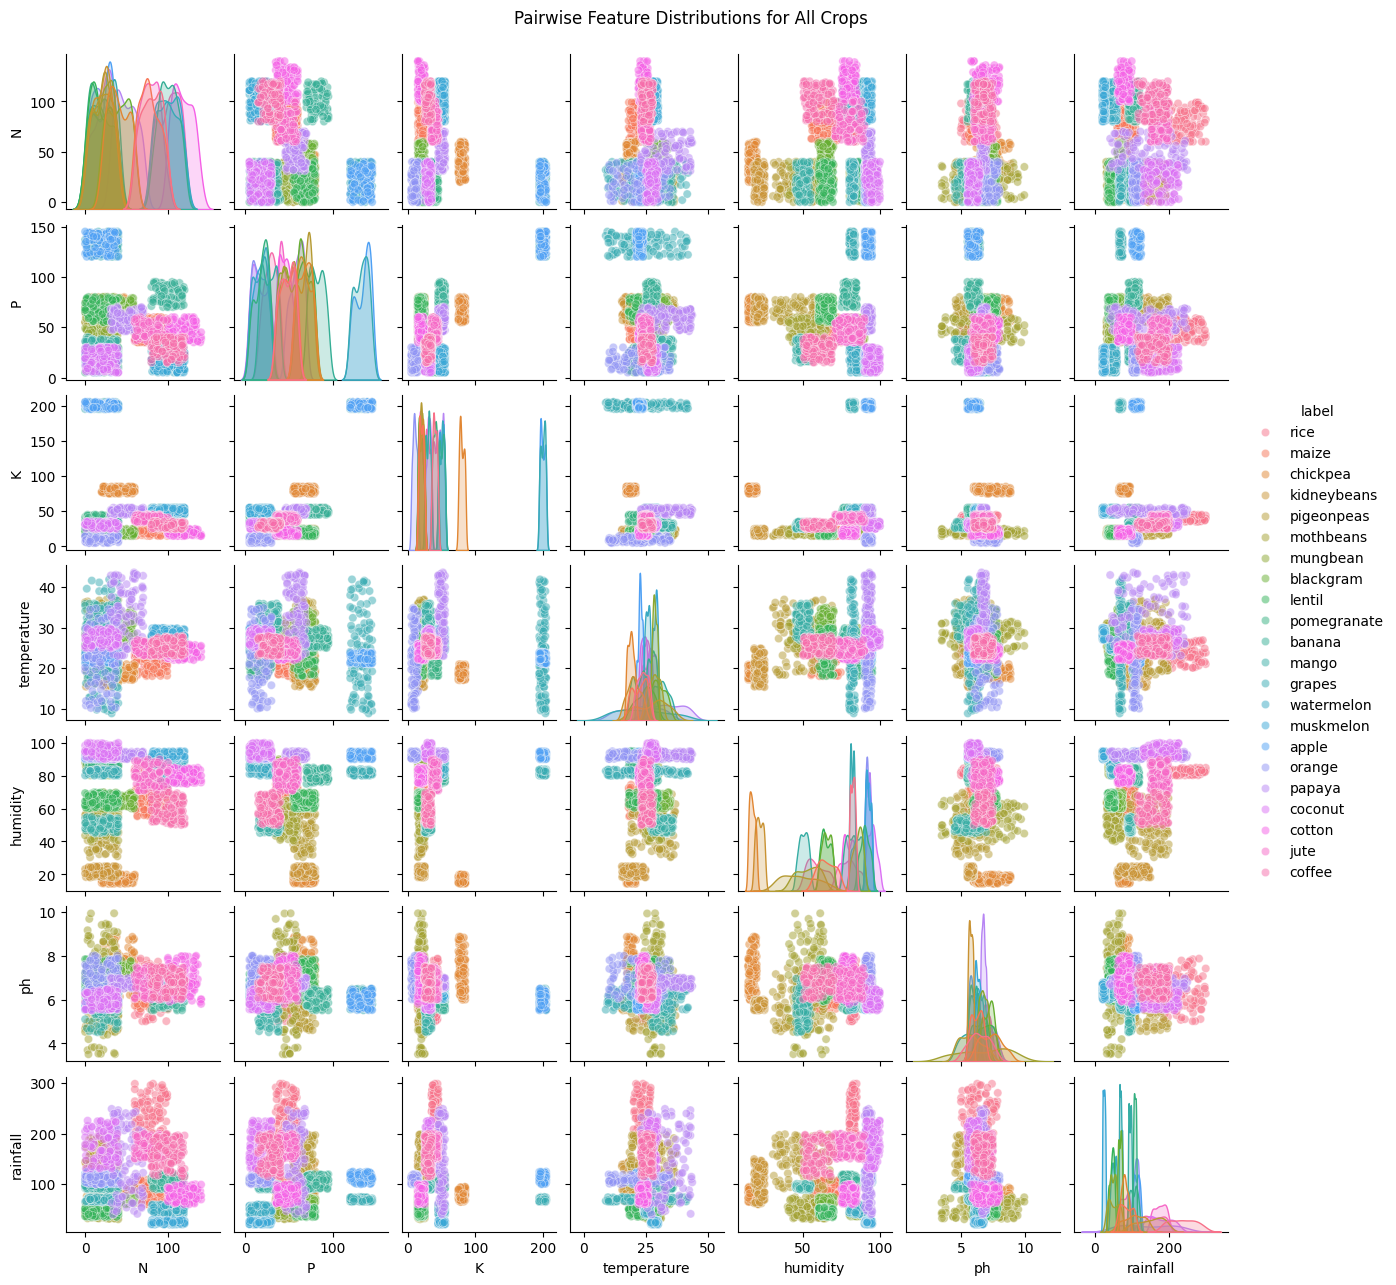

In [24]:
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(df, hue='label', plot_kws={'alpha': 0.5}, height=1.8)
plt.suptitle("Pairwise Feature Distributions for All Crops", y=1.02)
plt.show()

The pair plot showing the pairwise feature distributions for all crops provides a wealth of visual information. Here are some key findings:

* **Clear Separation of Many Crop Types**: The most significant finding is that many crop types form distinct clusters in the scatter plots when considering pairs of features. This is particularly evident in plots involving N, P, and K. This strong separation suggests that the environmental and nutrient features are powerful predictors for differentiating between crops.
* **Importance of Nutrient Levels**: The scatter plots involving N, P, and K show clear groupings based on nutrient requirements. Crops with similar nutrient needs tend to cluster together, while those with very different needs are well-separated. This reinforces the insights gained from the average NPK bar plot.
* **Temperature, Humidity, pH, and Rainfall also Contribute to Separation**: While perhaps not as dramatic as the nutrient features, temperature, humidity, pH, and rainfall also contribute to the separation of certain crop types. For example, crops requiring high rainfall (like rice) are clearly separated in plots involving rainfall. Similarly, humidity and temperature show distinct ranges for some crops.
* **Multimodal Distributions on the Diagonal**: The diagonal plots show the distribution of each individual feature, colored by crop type. These often reveal multimodal distributions, indicating that different crops thrive in different ranges of these features. This aligns with the insights from the individual feature distribution plots.
* **Relationships Between Features (Revisited)**: The scatter plots also visually confirm the relationships between features observed in the correlation heatmap. For instance, the positive correlation between P and K is visible as a general upward trend in their scatter plot, with different crop clusters positioned along this trend.
* **Potential for High Classification Accuracy**: The visible separation and clustering of crop types in this high-dimensional feature space suggest that a classification model trained on these features is likely to achieve high accuracy in recommending crops.